In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataSet = pd.read_csv("./Data.csv")
print(dataSet.iloc[:,:].isna().any())

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool


In [5]:
X = dataSet.iloc[:, :-1].values
y = dataSet.iloc[:, -1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**LOGISTIC REGRESSION**

In [23]:
from sklearn.linear_model import LogisticRegression
c1 = LogisticRegression()
c1.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = c1.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = c1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84  3]
 [ 3 47]]


0.9562043795620438

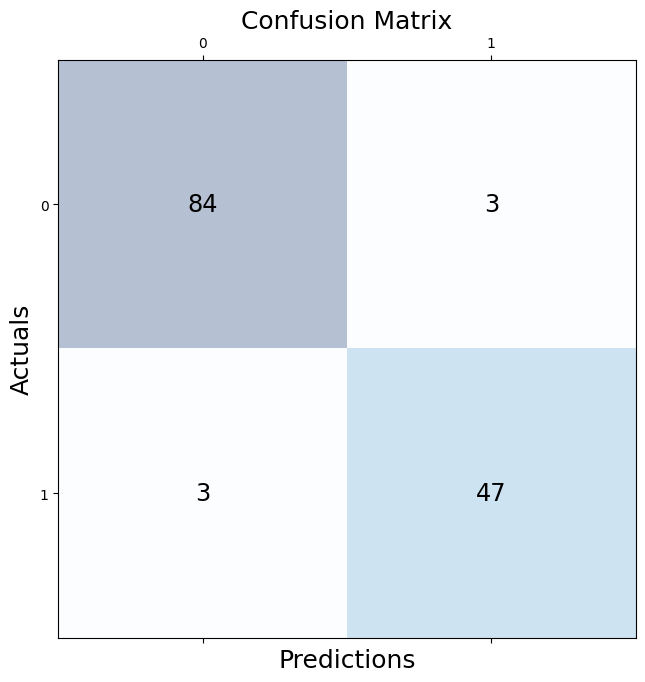

In [46]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**KNN**

In [47]:
from sklearn.neighbors import KNeighborsClassifier
c2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
c2.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
y_pred2 = c2.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_pred2, y_test)

[[83  4]
 [ 2 48]]


0.9562043795620438

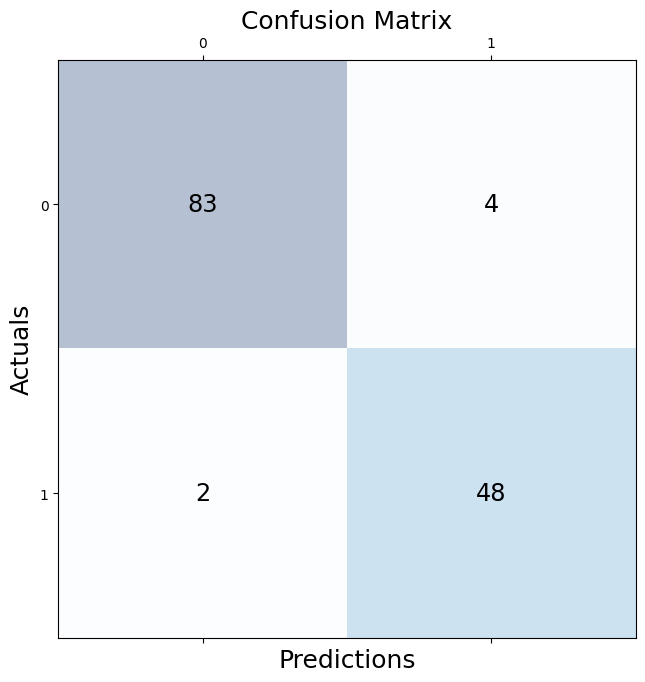

In [60]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**SVM**

In [51]:
from sklearn.svm import SVC
c3 = SVC(kernel='linear')
c3.fit(X_train, y_train)

SVC(kernel='linear')

In [52]:
y_pred3=c3.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_pred3, y_test)

[[83  4]
 [ 2 48]]


0.9562043795620438

**Random Forest**

In [61]:
from sklearn.ensemble import RandomForestClassifier
c4 = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
c4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [62]:
y_pred4 = c4.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_pred4, y_test)

[[84  3]
 [ 1 49]]


0.9708029197080292

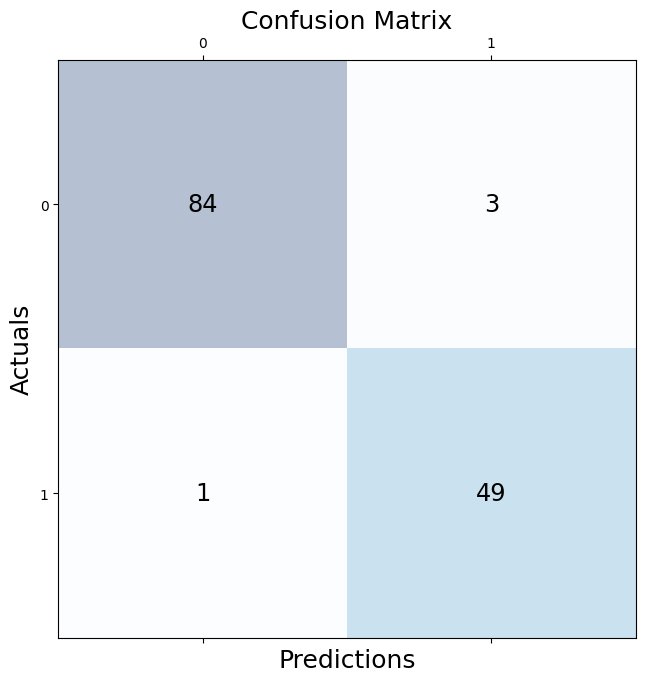

In [64]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()